# Introduction to Pandas

Pandas is a library used for manipulating and analysing 2-Dimensional data tables. In some ways you can think of it as SQL or Excel for python. 

It can do a lot more than either of those tools, but it's a good way to first consider what it might be useful for. 

So, let's just jump right in. It'll be easier to show you what it can do, than explain everything.

## Loading files

Pandas natively understands quite a lot of formats including CSV, Excel and HTML. You can see a full list of formats it understands here https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

For now we're going to be working with CSV files. 

In [1]:
import pandas as pd

data_url = 'https://www.opendatani.gov.uk/dataset/80dc9542-7b2a-48f5-bbf4-ccc7040d36af/resource/6fd51851-df78-4469-98c5-4f06953621a0/download/police-recorded-crime-monthly-data.csv'
df = pd.read_csv(data_url, parse_dates={'datetime': ['Calendar_Year', 'Month']})
df.set_index('datetime', inplace=True)

df.head()

,Policing_District,Crime_Type,Data_Measure,Count
datetime,,,,
2001-04-01,Northern Ireland,Violence with injury (including homicide & dea...,Police Recorded Crime,738
2001-04-01,Northern Ireland,Violence without injury (including harassment),Police Recorded Crime,1498
2001-04-01,Northern Ireland,Sexual offences,Police Recorded Crime,133
2001-04-01,Northern Ireland,Robbery,Police Recorded Crime,158
2001-04-01,Northern Ireland,Theft - burglary residential,Police Recorded Crime,0


In this example I've used a csv file that is hosted online, but you could use a local file in the same manner. Newer versions of Pandas will automatically understand that it needs to download the file from the internet.

Here's a sample of the raw CSV that we've loaded

```csv
Calendar_Year,Month,Policing_District,Crime_Type,Data_Measure,Count
2001,Apr,Northern Ireland,Violence with injury (including homicide & death/serious injury by unlawful driving),Police Recorded Crime,738
2001,Apr,Northern Ireland,Violence without injury (including harassment),Police Recorded Crime,1498
2001,Apr,Northern Ireland,Sexual offences,Police Recorded Crime,133
2001,Apr,Northern Ireland,Robbery,Police Recorded Crime,158
```

The first thing to note is that we have headers for each of the columns. Pandas will by default read the first line of your input data and use that as your column headers. 

So, you can see that they're quite similar, but the first column in the pandas frame is a little different. 

```python
df = pd.read_csv(data_url, parse_dates={'datetime': ['Calendar_Year', 'Month']})
```

This line creates a new pandas DataFrame (df) from a CSV file. When reading that file we tell Pandas to combine the two columns 'Calendar_Year' and 'Month' into one new column called 'datetime'. 

The date parsing in Pandas is quite powerful and flexible. If you have a time / date format in your data set, you can definitely get Pandas to read it. The most flexible way of doing it is by writing your own function and using the `date_parser`. 

Note however, if you are reading a large file, it can be quite slow. You may have better results using the `to_datetime` function, you can read more about that here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

If you want to read more about the `read_csv` function, this site has a lot of good information https://honingds.com/blog/pandas-read_csv/

The next line
```python
df.set_index('datetime', inplace=True)
```
sets the 'datetime' column in the data frame as the index, the equivalent in excel is the numbers down the side of the screen, the SQL equivalent would be a primary key. 

When we pass `inplace=True` to this function it means that we don't get a copy of the data frame back. The operation is carried out on the dataframe in question. 

```python
df.head()
```
This just prints out the head of the data frame, it's useful just to check what you're doing as you go along. Normally it wouldn't be used in an actual program. 

## Slicing data

OK, now we've read the data in and sorted out our index, lets get some more interesting data from it

In [2]:
crime =  'Bicycle theft' # 'Total police recorded crime', 'Possession of drugs'

bikes_df = df.loc[(df['Crime_Type'] == crime) & 
                  (df['Data_Measure'] == 'Police Recorded Crime') & 
                  (df['Policing_District'].isin(['Mid & East Antrim', 
                                                 'Belfast City', 
                                                 'Mid Ulster', 
                                                 'Causeway Coast & Glens'])) & 
                  (df.index > pd.to_datetime('2014'))]

bikes_df.head()

,Policing_District,Crime_Type,Data_Measure,Count
datetime,,,,
2014-02-01,Belfast City,Bicycle theft,Police Recorded Crime,43
2014-02-01,Mid Ulster,Bicycle theft,Police Recorded Crime,0
2014-02-01,Causeway Coast & Glens,Bicycle theft,Police Recorded Crime,1
2014-02-01,Mid & East Antrim,Bicycle theft,Police Recorded Crime,1
2014-03-01,Belfast City,Bicycle theft,Police Recorded Crime,42


In this section we are creating a new DataFrame called bikes_df. We're creating it from the original df that we read in using the `read_csv` funtion, but we're only taking a subset of that information. 

In Pandas you will often work with entire columns or data sets, this is a large part of why it's so useful, it makes it very easy to pull out all the data that you ar interested in quickly. You don't need to iterate over each of the rows or columns individually. 

Here we are 
```python
crime =  'Bicycle theft' # 'Total police recorded crime', 'Possession of drugs'

bikes_df = df.loc[(df['Crime_Type'] == crime) & 
                  (df['Data_Measure'] == 'Police Recorded Crime') & 
```

taking every row that has a 'Crime_Type' of 'Bicycle theft' and also a 'Data_Measure' of 'Police Recorded Crime'.

If you look at the data set you will see that there are a number of lines that include a percentage figure, so we filter these out with the 'Police Recorded Crime', and obviously the 'Bicycle theft' gives us just the number of reported bicycle thefts. 

You may notice the `&` at the end of the line. This is important here as we're using multiple criteria to filter the data. It just means `and`, as in you need to match this thing and this thing. 

So what if we wanted to match multiple entries, that's what the next line does

```python
                  (df['Policing_District'].isin(['Mid & East Antrim', 
                                                 'Belfast City', 
                                                 'Mid Ulster', 
                                                 'Causeway Coast & Glens'])) & 
```
We use the method `.isin()` and pass it a list of values that we are interested in. 

Lastly, we tell is we only want entries that happened from 2014 onwards

```python
                  (df.index > pd.to_datetime('2014'))]
```
It's important to use the `to_datetime` function here as we've change the index from a regular string, to a pandas date time object. 

In [3]:
bikes_df = bikes_df.drop(['Crime_Type', 'Data_Measure'], axis=1)


bikes_df.head()

,Policing_District,Count
datetime,,
2014-02-01,Belfast City,43
2014-02-01,Mid Ulster,0
2014-02-01,Causeway Coast & Glens,1
2014-02-01,Mid & East Antrim,1
2014-03-01,Belfast City,42


Now let's get rid of some of the columns we're not using. 

```python
bikes_df = bikes_df.drop(['Crime_Type', 'Data_Measure'], axis=1)
```

Here we are telling it to drop two columns, 'Crime_Type' and 'Data_Measure'. Earlier we filtered using these two by a single value, so we know that everything in our current data frame is already containing the same 'Crime_Type' and 'Data_Measure'.

The important thing to note here is `axis=1`. This tells pandas that it's a column we want to drop, not a row. You can use the same function to remove rows, for example if we wanted to remove all of the entries that happened on the '2014-02-01', we could use

```
bikes = bikes_df.drop(pd.to_datetime('2014-02-01'))
```

For added clarity, you can also use `axis='index'` (instead of axis=0) or `axis='columns'` (instead of axis=1).

In [4]:
bikes_df['Count'] = pd.to_numeric(bikes_df['Count'], errors='ignore')

bikes_df.head()

,Policing_District,Count
datetime,,
2014-02-01,Belfast City,43
2014-02-01,Mid Ulster,0
2014-02-01,Causeway Coast & Glens,1
2014-02-01,Mid & East Antrim,1
2014-03-01,Belfast City,42


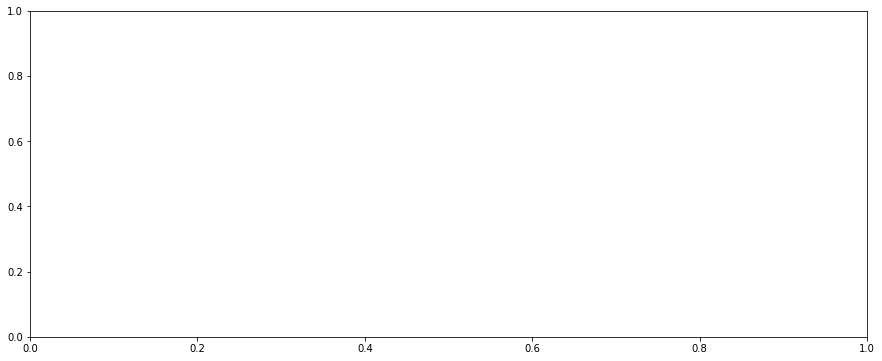

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('fivethirtyeight')


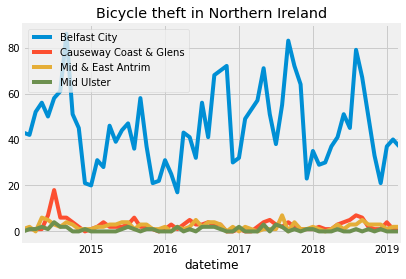

In [6]:
bikes_df.groupby('Policing_District')['Count'].plot(legend=True, title='{0} in Northern Ireland'.format(crime))
bikes_df.head()
plt.show()


In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_url = 'https://www.opendatani.gov.uk/dataset/80dc9542-7b2a-48f5-bbf4-ccc7040d36af/resource/6fd51851-df78-4469-98c5-4f06953621a0/download/police-recorded-crime-monthly-data.csv'
df = pd.read_csv(data_url, parse_dates={'datetime': ['Calendar_Year', 'Month']})
df.set_index('datetime', inplace=True)

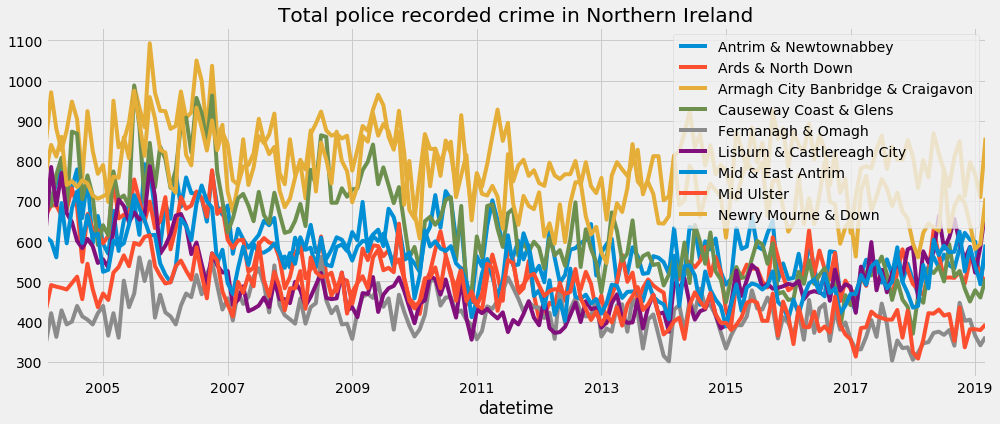

In [26]:
crime = 'Bicycle theft' # 'Total police recorded crime', 'Possession of drugs'
crime = 'Total police recorded crime' 
bikes_df = df.loc[(df['Crime_Type'] == crime) & 
                  (df['Data_Measure'] == 'Police Recorded Crime') & 
                  (df['Policing_District'].isin(['Lisburn & Castlereagh City',
                                                 'Mid Ulster',
                                                 'Ards & North Down',
                                                 'Newry Mourne & Down',
                                                 'Antrim & Newtownabbey',
                                                 'Mid & East Antrim',
                                                 'Derry City & Strabane',
                                                 'Fermanagh & Omagh',
                                                 'Armagh City Banbridge & Craigavon',
                                                 'Causeway Coast & Glens'])) & 
                  (df.index > pd.to_datetime('2004'))]
bikes_df = bikes_df.drop(['Crime_Type', 'Data_Measure'], axis=1)
bikes_df['Count'] = pd.to_numeric(bikes_df['Count'], errors='ignore')
fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('fivethirtyeight')
bikes_df.groupby('Policing_District')['Count'].plot(legend=True, title='{0} in Northern Ireland'.format(crime))
plt.show()

In [9]:
bikes_df.to_csv('file.csv')
bikes_df.to_excel('file.xlsx')

In [10]:
bikes_df.shape

(1820, 2)

In [11]:
bikes_df.index

DatetimeIndex(['2004-02-01', '2004-02-01', '2004-02-01', '2004-02-01',
               '2004-02-01', '2004-02-01', '2004-02-01', '2004-02-01',
               '2004-02-01', '2004-02-01',
               ...
               '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01',
               '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01',
               '2019-03-01', '2019-03-01'],
              dtype='datetime64[ns]', name='datetime', length=1820, freq=None)

In [12]:
bikes_df.columns

Index(['Policing_District', 'Count'], dtype='object')

In [13]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1820 entries, 2004-02-01 to 2019-03-01
Data columns (total 2 columns):
Policing_District    1820 non-null object
Count                1820 non-null int64
dtypes: int64(1), object(1)
memory usage: 42.7+ KB


In [14]:
bikes_df.count()

Policing_District    1820
Count                1820
dtype: int64

In [15]:
bikes_df.sum()

Policing_District    Belfast CityLisburn & Castlereagh CityArds & N...
Count                                                           339077
dtype: object

In [16]:
bikes_df.cumsum()

,Policing_District,Count
datetime,,
2004-02-01,Belfast City,733
2004-02-01,Belfast CityLisburn & Castlereagh City,869
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1067
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1251
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1488
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1599
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1673
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,1867
2004-02-01,Belfast CityLisburn & Castlereagh CityArds & N...,2044


In [17]:
bikes_df.describe()

,Count
count,1820.000000
mean,186.306044
std,161.810979
min,41.000000
25%,100.000000
50%,136.000000
75%,186.250000
max,1122.000000


In [18]:
bikes_df.min()

Policing_District    Antrim & Newtownabbey
Count                                   41
dtype: object

In [19]:
bikes_df.max()

Policing_District    Newry Mourne & Down
Count                               1122
dtype: object

In [20]:
bikes_df.mean()

Count    186.306044
dtype: float64

In [21]:
bikes_df.median()

Count    136.0
dtype: float64

In [27]:
bikes_df.describe()

,Count
count,1638.000000
mean,582.822955
std,148.563948
min,301.000000
25%,467.000000
50%,552.500000
75%,690.000000
max,1093.000000
